# Moving Average Smoothing

This notebook demonstrates how to apply Moving Average (MA) smoothing to a time series using the `darts` library in Python. MA smoothing is a technique used to reduce noise and highlight trends in time series data by averaging data points within a specified window.

**Mathematical Definition**:
Given a time series $y_t$, the moving average smoothed value $\hat{y}_t$ at time $t$ with window size $w$ is defined as:
$$ \hat{y}_t = \frac{1}{w} \sum_{i=0}^{w-1} y_{t-i} $$

In [ ]:
import sys

if 'google.colab' in sys.modules:
    !pip install -q darts pandas numpy matplotlib statsforecast prophet==1.2.1 cmdstanpy==1.2.5

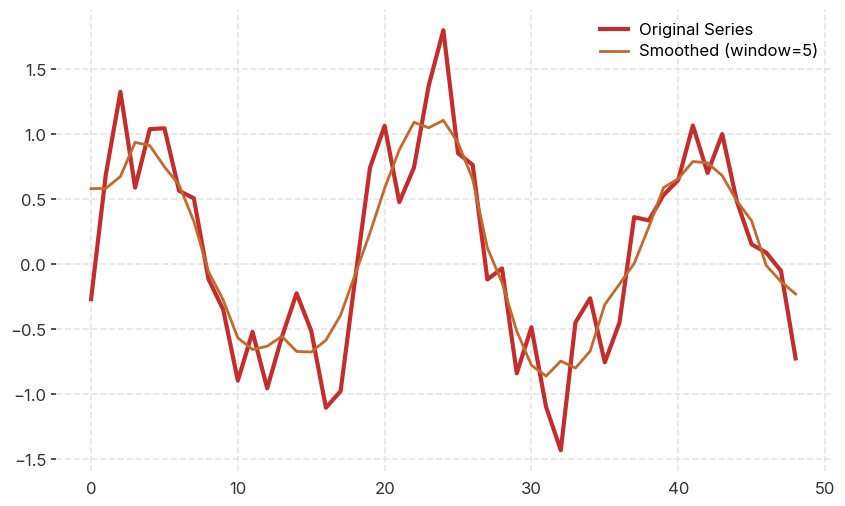

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from darts import TimeSeries
from darts.models import MovingAverageFilter

time = np.arange(1, 50)
values = np.sin(time / 3) + np.random.normal(scale=0.3, size=len(time))
series = TimeSeries.from_values(values)


# Average and Plotting function
def plot_moving_average(series, window):
    plt.figure(figsize=(10, 6))

    series.plot(label="Original Series", linewidth=3)

    model = MovingAverageFilter(window=window)
    smoothed = model.filter(series)

    smoothed.plot(label=f"Smoothed (window={window})")
    plt.xlabel("")

    plt.legend()
        
    plt.show()
    
plot_moving_average(series, window=5)

In [ ]:
from ipywidgets import interact, IntSlider, fixed

interact(
    plot_moving_average,
    series = fixed(series),
    window=IntSlider(
        value=3,
        min=1,
        max=20,
        step=1,
        description="Window Size"
    )
)